# Chapter 8 - R Exercises

In [1]:
library(tidyverse)
library(bayesrules)
library(bayesplot)
library(rstan)
library(grid)
library(gridExtra)
library(janitor)
library(broom.mixed)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting

Loading required package: StanHeaders

rstan (Version 2.21.8, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recomp

## Exercise 8.6

### a)

In [2]:
qbeta( c(0.025, 0.975), 4, 5 )

[1] 0.1570128 0.7551368

### b)

In [3]:
qbeta( c(0.2, 0.8), 4, 5 )

[1] 0.3032258 0.5836554

### c)

In [4]:
qgamma( c(0.025, 0.975), 1, 8 )

[1] 0.003164726 0.461109932

## Exercise 8.7

### a)

In [5]:
qgamma( c(0.005, 0.995), 1, 5 )

[1] 0.001002508 1.059663473

### b)

In [6]:
qnorm( c(0.025, 0.975), mean = 10, sd = 2 )

[1]  6.080072 13.919928

### c)

In [7]:
qnorm( c(0.1, 0.9), mean = -3, sd = 1 )

[1] -4.281552 -1.718448

## Exercise 8.8

### a)

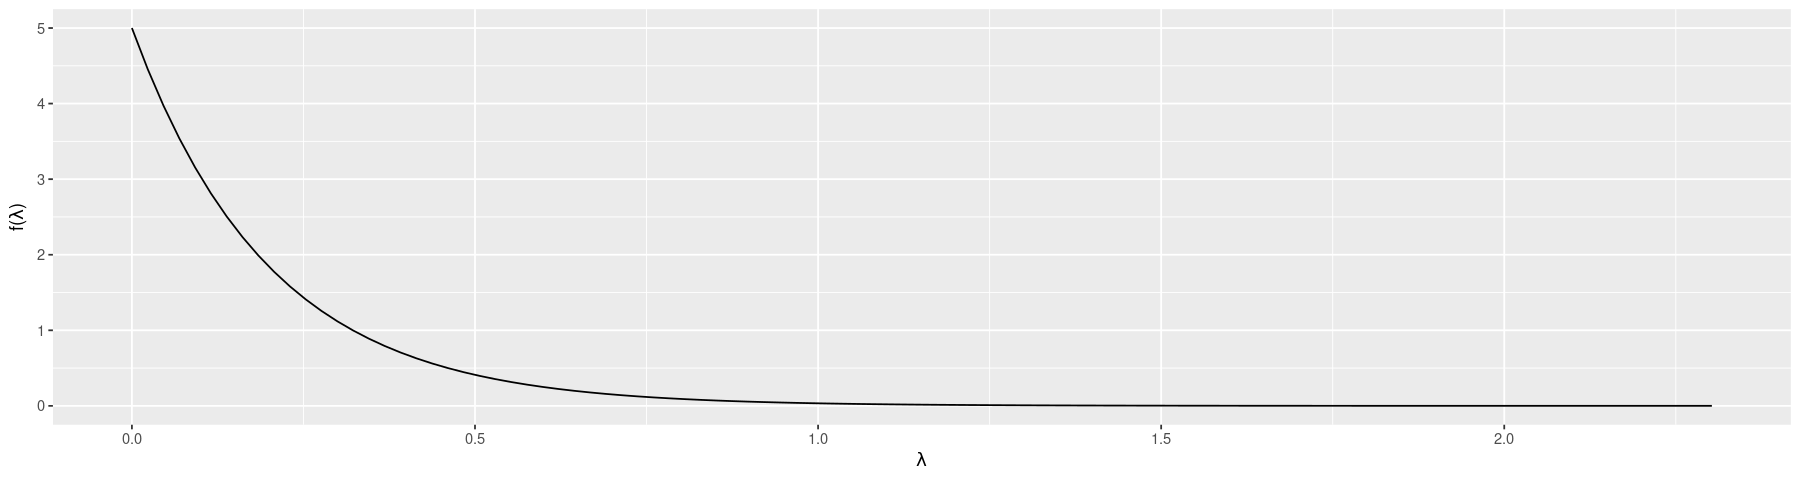

In [8]:
options(repr.plot.width=15, repr.plot.height=4)
plot_gamma(1, 5)

In [9]:
qgamma( c(0, 0.95), 1, 5 )

[1] 0.0000000 0.5991465

### b)

In [10]:
qgamma( c(0.025, 0.975), 1, 5 )

[1] 0.005063562 0.737775891

### d) and e)

In [11]:
qnorm( c(0.025, 0.975), mean = -13, sd = 2 )

[1] -16.919928  -9.080072

## Exercise 8.9 

### a)

In [12]:
post_pHa <- 1-pbeta(0.4, 4, 3)
post_pHa

[1] 0.8208

### b)

In [13]:
post_pH0 <- pbeta(0.4, 4, 3)
post_pH0

[1] 0.1792

In [14]:
postodds <- post_pHa / post_pH0
postodds

[1] 4.580357

### c)

In [15]:
prior_pHa <- 1-pbeta(0.4, 1, 0.8)
prior_pHa

[1] 0.6645398

In [16]:
prior_pH0 <- pbeta(0.4, 1, 0.8)
prior_pH0

[1] 0.3354602

In [17]:
priorodds <- prior_pHa / prior_pH0
priorodds

[1] 1.98098

### d)

In [18]:
postodds / priorodds

[1] 2.312168

## Exercise 8.10

### a)

In [19]:
post_pHa <- pnorm(5.2, mean=5, sd=3)
post_pHa

[1] 0.5265765

### b)

In [20]:
post_pH0 <- 1-post_pHa
post_pH0

[1] 0.4734235

In [21]:
postodds <- post_pHa / post_pH0
postodds

[1] 1.112274

### c)

In [22]:
prior_pHa <- pnorm(5.2, mean=10, sd=10)
prior_pHa

[1] 0.3156137

In [23]:
prior_pH0 <- 1-prior_pHa
prior_pH0

[1] 0.6843863

In [24]:
priorodds <- prior_pHa / prior_pH0
priorodds

[1] 0.4611631

### d)

In [25]:
postodds / priorodds

[1] 2.411888

## Exercise 8.11

### e)

In [26]:
post_pred_pmf <- function(yprime) {
    choose(4, yprime) * gamma(110)/(gamma(18)*gamma(92)) * (gamma(18+yprime)*gamma(96-yprime))/gamma(114)
}

In [27]:
post_pred_pmf_eval <- data.frame(yprime=c(0,1,2,3,4)) %>% 
                        mutate(p=post_pred_pmf(yprime))
post_pred_pmf_eval

yprime,p
<dbl>,<dbl>
0,0.4944360232
1,0.3747304597
2,0.1136150862
3,0.0162889012
4,0.0009295297


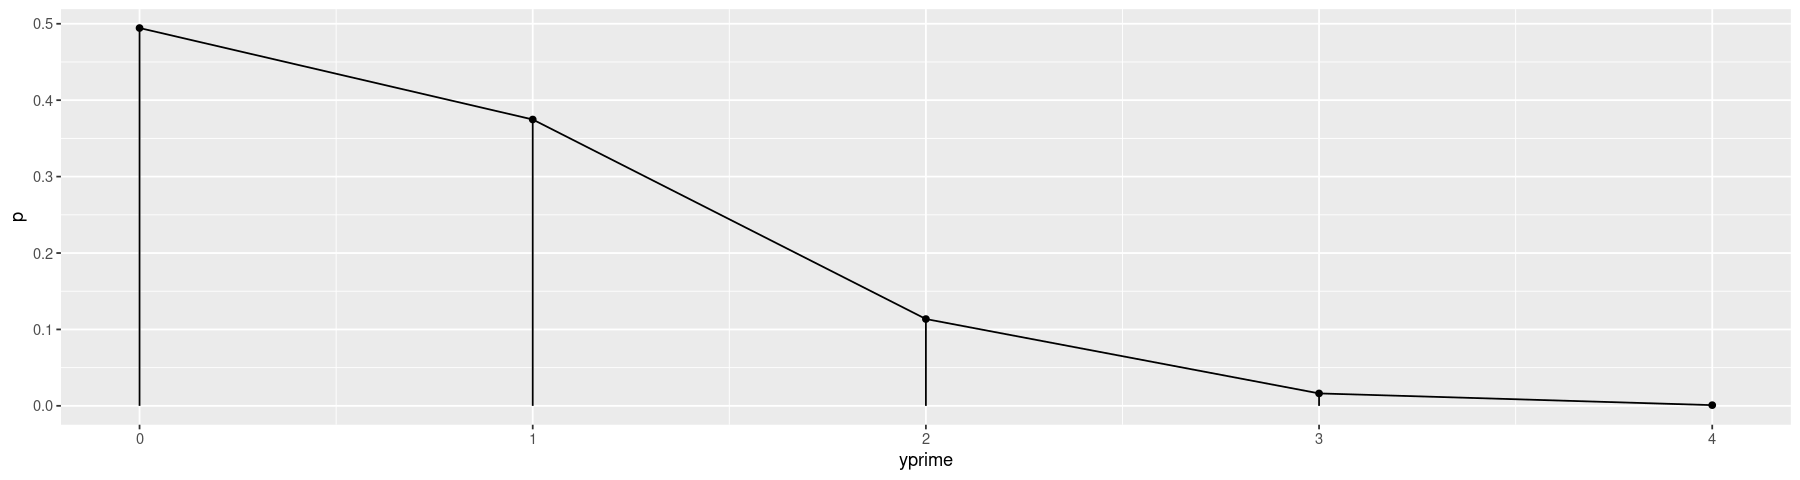

In [28]:
ggplot( post_pred_pmf_eval, aes(x=yprime, y=p) ) + 
    geom_point() + 
    geom_line() +
    geom_segment( aes(x=yprime, xend=yprime, y=0, yend=p ) )

Expectation:

In [29]:
sum( post_pred_pmf_eval$yprime * post_pred_pmf_eval$p )

[1] 0.6545455

## Exercise 8.12

### e)

In [30]:
post_pred_pmf <- function(yprime) {
    1/factorial(yprime) * gamma(57+yprime)/(gamma(57)) * 51^57 / 52^(57+yprime)
}

In [31]:
post_pred_pmf_eval <- data.frame(yprime=seq(0,10,1)) %>% 
                        mutate(p=post_pred_pmf(yprime))
head( post_pred_pmf_eval, 10 )

,yprime,p
,<dbl>,<dbl>
1,0,3.306050e-01
2,1,3.623940e-01
3,2,2.021043e-01
4,3,7.643689e-02
5,4,2.204910e-02
6,5,5.173059e-03
7,6,1.027980e-03
8,7,1.779196e-04
9,8,2.737224e-05


In [32]:
sum( post_pred_pmf_eval$p )

[1] 0.9999999

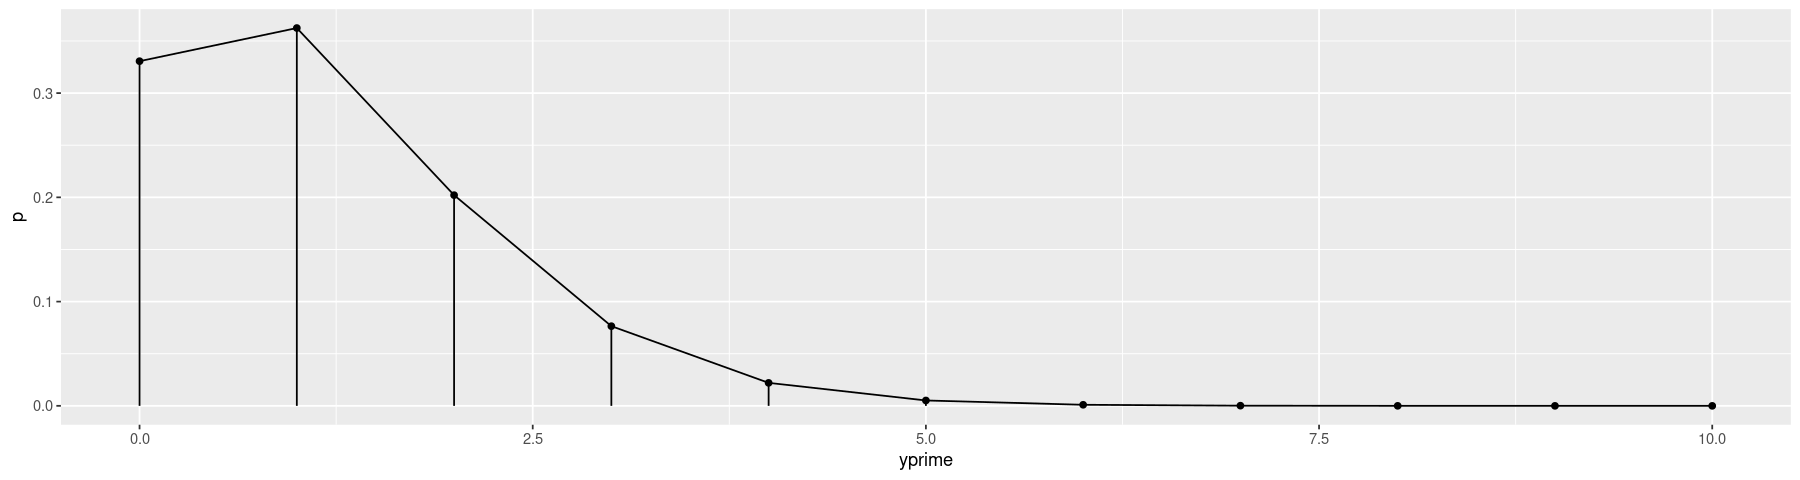

In [33]:
ggplot( post_pred_pmf_eval, aes(x=yprime, y=p) ) + 
    geom_point() + 
    geom_line() +
    geom_segment( aes(x=yprime, xend=yprime, y=0, yend=p ) )

## Exercise 8.13

### e)

In [34]:
post_pred_pdf <- function(yprime) {
    dnorm(yprime, mean=-1, sd=sqrt(9.81))
}

In [35]:
delta <- 0.5
post_pred_pdf_eval <- data.frame(yprime=seq(-15,15,delta)) %>% 
                        mutate(p=post_pred_pdf(yprime))
head( post_pred_pdf_eval, 10 )

,yprime,p
,<dbl>,<dbl>
1,-15.0,5.841950e-06
2,-14.5,1.177384e-05
3,-14.0,2.313187e-05
4,-13.5,4.430327e-05
5,-13.0,8.271669e-05
6,-12.5,1.505507e-04
7,-12.0,2.671191e-04
8,-11.5,4.620185e-04
9,-11.0,7.790155e-04


In [36]:
sum( post_pred_pdf_eval$p ) * delta # approximate integral

[1] 0.9999973

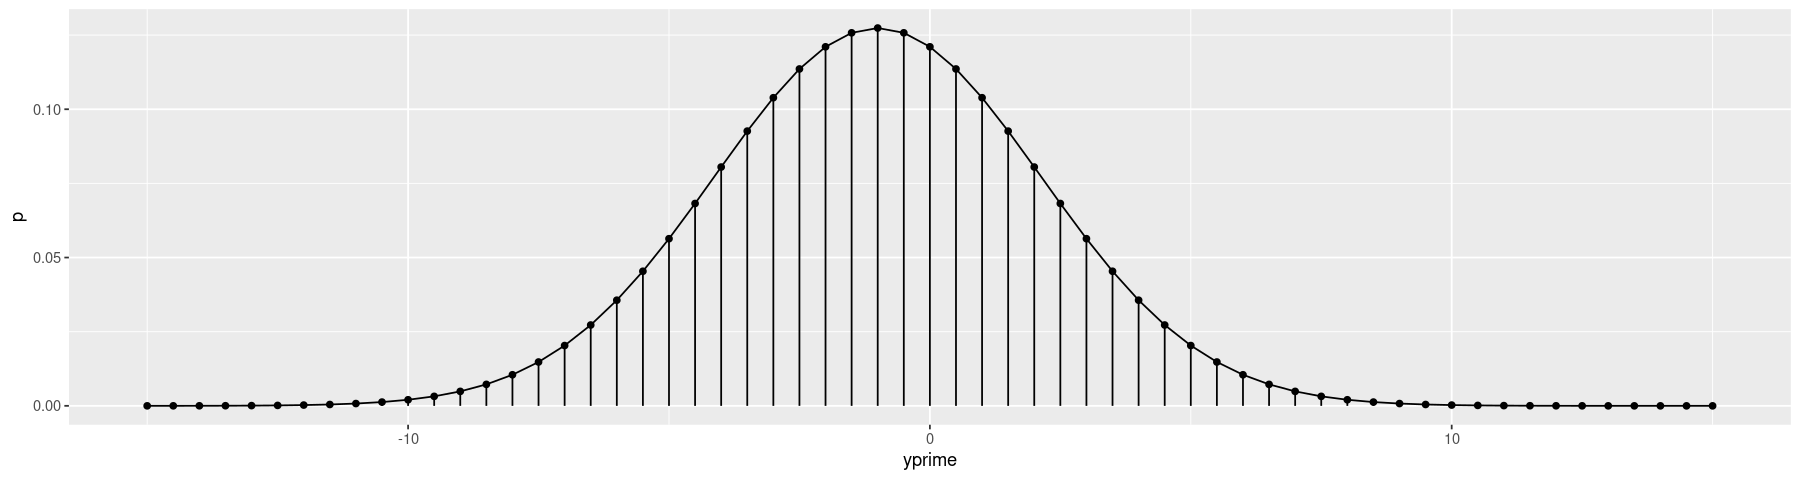

In [37]:
ggplot( post_pred_pdf_eval, aes(x=yprime, y=p) ) + 
    geom_point() + 
    geom_line() +
    geom_segment( aes(x=yprime, xend=yprime, y=0, yend=p ) )

## Exercise 8.14

### b)

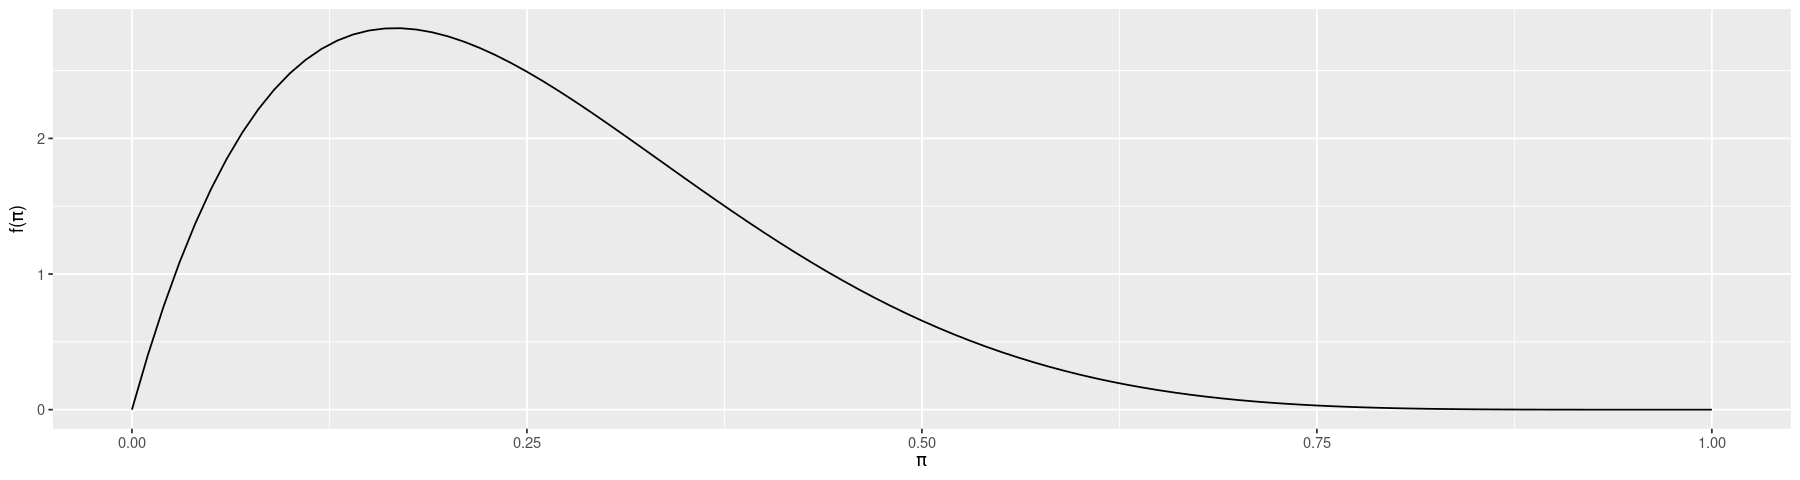

In [38]:
plot_beta( alpha=2, beta=6 )

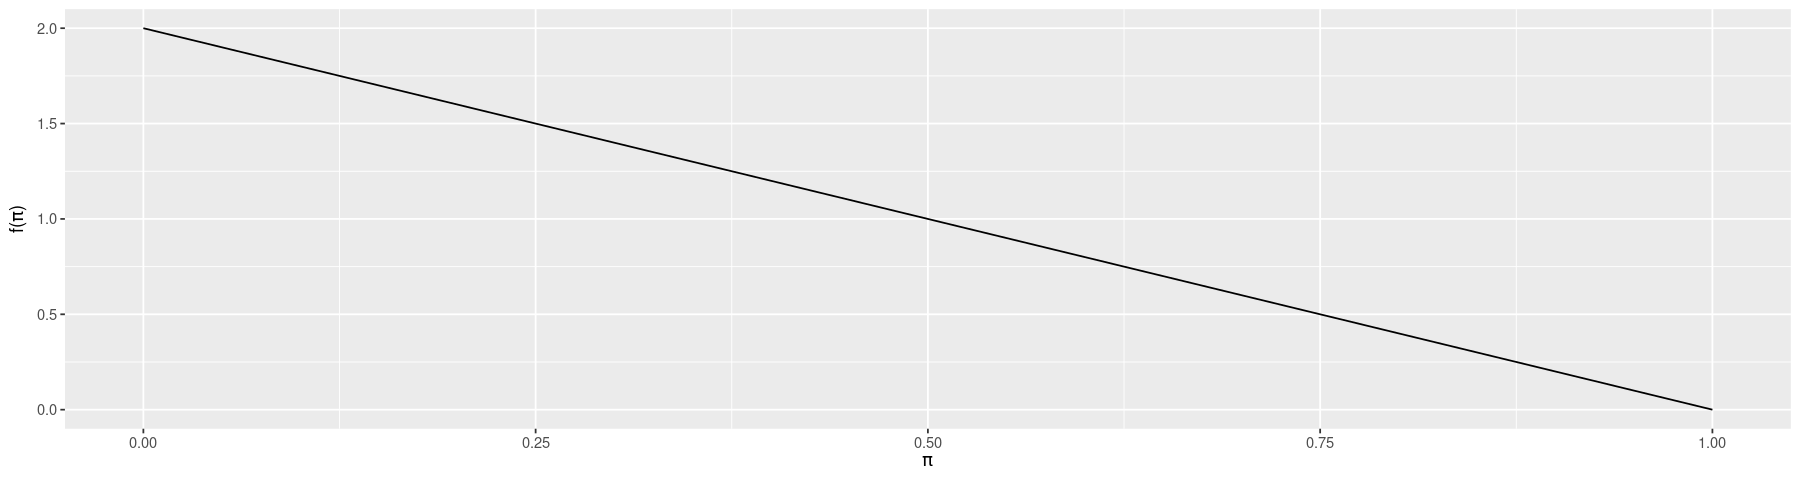

In [39]:
plot_beta( alpha=1, beta=2 )

### d)

In [40]:
head( pulse_of_the_nation )

income,age,party,trump_approval,education,robots,climate_change,transformers,science_is_honest,vaccines_are_safe,books,ghosts,fed_sci_budget,earth_sun,wise_unwise
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<lgl>,<fct>
8,64,Democrat,Strongly disapprove,College degree,Unlikely,Real and Caused by People,1,Strongly Agree,Somewhat Disagree,20,Yes,Too Low,FALSE,Wise but Unhappy
68,56,Democrat,Strongly disapprove,High school,Unlikely,Real and Caused by People,0,Somewhat Agree,Somewhat Disagree,6,No,Too High,FALSE,Wise but Unhappy
46,63,Independent,Somewhat Approve,Some college,Unlikely,Real but not Caused by People,0,Somewhat Agree,Strongly Agree,0,No,About Right,TRUE,Happy but Unwise
51,48,Republican,Strongly Approve,High school,Unlikely,Not Real At All,0,Somewhat Disagree,Somewhat Disagree,1,No,About Right,FALSE,Happy but Unwise
100,32,Democrat,Somewhat Approve,Some college,Unlikely,Real and Caused by People,1,Strongly Agree,Strongly Agree,30,Yes,Too Low,FALSE,Wise but Unhappy
54,64,Democrat,Strongly disapprove,Some college,Unlikely,Real and Caused by People,0,Strongly Agree,Strongly Agree,15,No,Too Low,TRUE,Wise but Unhappy


In [41]:
table( pulse_of_the_nation$climate_change )


              Not Real At All     Real and Caused by People 
                          150                           655 
Real but not Caused by People 
                          195 

In [42]:
pulse_of_the_nation %>% 
    group_by( climate_change ) %>% 
    summarize( count=n(), prop=n()/dim(pulse_of_the_nation)[1] )

climate_change,count,prop
<fct>,<int>,<dbl>
Not Real At All,150,0.150
Real and Caused by People,655,0.655
Real but not Caused by People,195,0.195


A 15% proportion!

### e)

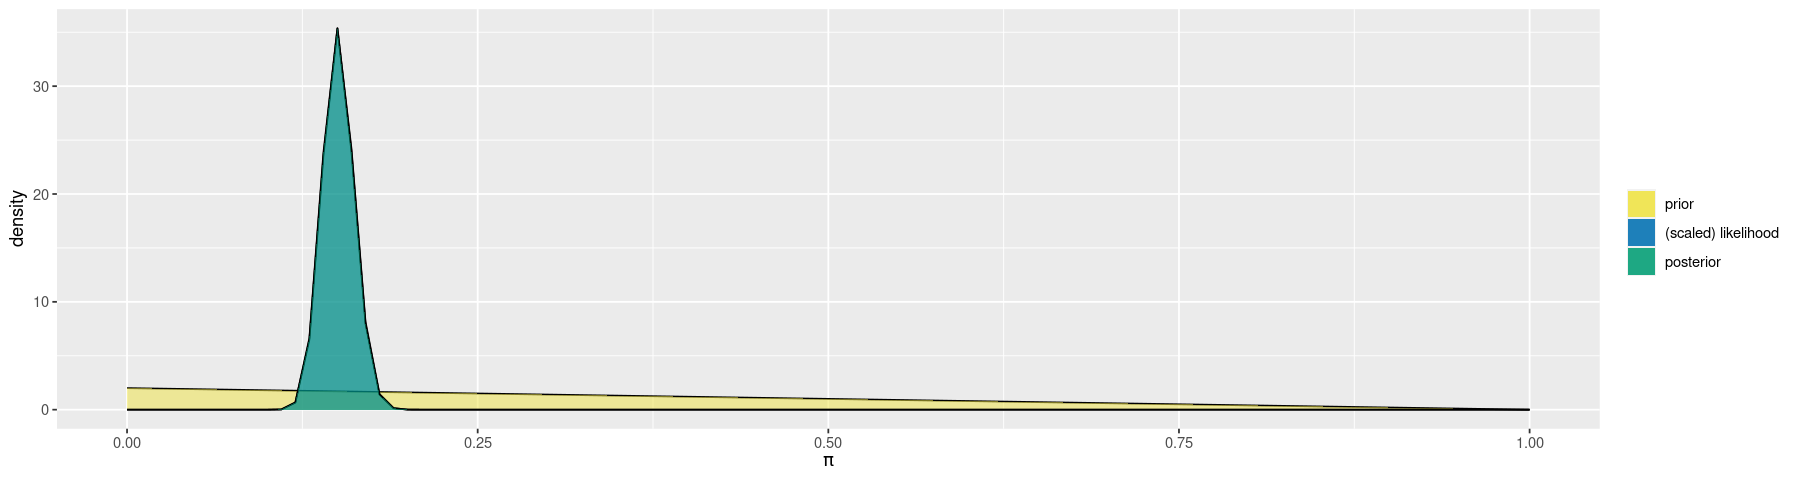

In [43]:
plot_beta_binomial( alpha=1, beta=2, y=150, n=1000 )

In [44]:
summarize_beta_binomial( alpha=1, beta=2, y=150, n=1000 )

model,alpha,beta,mean,mode,var,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
prior,1,2,0.3333333,0.0000000,0.0555555556,0.23570226
posterior,151,852,0.1505484,0.1498501,0.0001273741,0.01128601


Middle 95% posterior credible interval:

In [45]:
0.05/2

[1] 0.025

In [46]:
qbeta(c(0.025, 0.975), 151, 852)

[1] 0.1291000 0.1733164

## Exercise 8.15

### b)

In [47]:
post_pHa <- 1-pbeta(0.1, 151, 852)
post_pHa

[1] 0.9999997

### c)

In [48]:
post_pH0 <- 1-post_pHa
prior_pH0 <- pbeta(0.1, 1, 2)
prior_pHa <- 1-prior_pH0

In [49]:
post_odds <- post_pHa / post_pH0
post_odds

[1] 3197444

In [50]:
prior_odds <- prior_pHa / prior_pH0
prior_odds

[1] 4.263158

In [51]:
BF <- post_odds / prior_odds
BF

[1] 750017.6

## Exercise 8.16

### a)

Define the model:

In [52]:
climate_change_model <- "
    data {
        int<lower=0, upper=1000> Y;
    }
    parameters {
        real<lower=0, upper=1> pi;
    }
    model {
        Y ~ binomial(1000, pi);
        pi ~ beta(1, 2);
    }
"

Simulate the posterior:

In [53]:
climate_change_sim <- stan( 
    model_code = climate_change_model,
    data = list(Y=150),
    chains = 4,
    iter = 10000*2,
    seed = 123
)


SAMPLING FOR MODEL '449304952157c8161fe4f05454e1184e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:     1 / 20000 [  0%]  (Warmup)
Chain 1: Iteration:  2000 / 20000 [ 10%]  (Warmup)
Chain 1: Iteration:  4000 / 20000 [ 20%]  (Warmup)
Chain 1: Iteration:  6000 / 20000 [ 30%]  (Warmup)
Chain 1: Iteration:  8000 / 20000 [ 40%]  (Warmup)
Chain 1: Iteration: 10000 / 20000 [ 50%]  (Warmup)
Chain 1: Iteration: 10001 / 20000 [ 50%]  (Sampling)
Chain 1: Iteration: 12000 / 20000 [ 60%]  (Sampling)
Chain 1: Iteration: 14000 / 20000 [ 70%]  (Sampling)
Chain 1: Iteration: 16000 / 20000 [ 80%]  (Sampling)
Chain 1: Iteration: 18000 / 20000 [ 90%]  (Sampling)
Chain 1: Iteration: 20000 / 20000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.030633 seconds (Warm-up)
Chain 1:                0.0330

## b)

#### Trace plots:

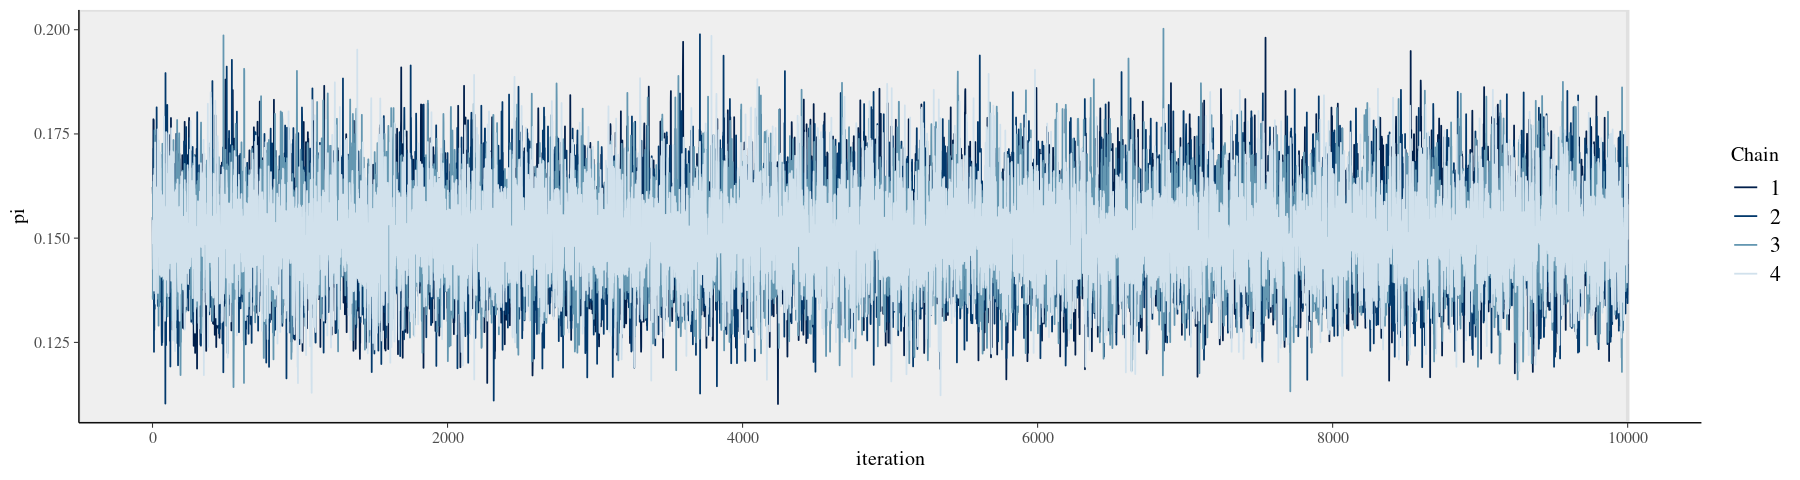

In [54]:
mcmc_trace( climate_change_sim, pars="pi", size=0.5, n_warmup=10000 ) + xlab("iteration")

At first sight it looks like all the chains have mixed well!

#### Density overlays:

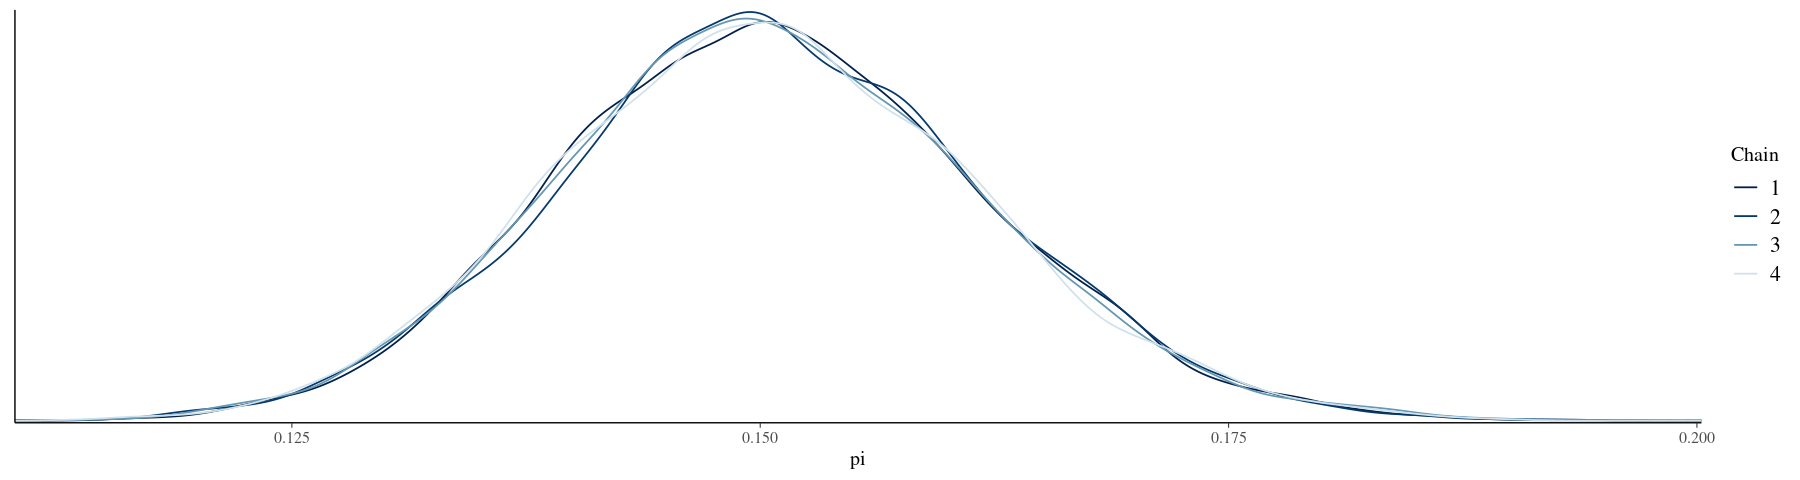

In [55]:
mcmc_dens_overlay( climate_change_sim, pars="pi" )

The densities are also quite similar, it seems that all chains have explored the full distribution.

#### Autocorrelation plots:

Warning message:
“The `facets` argument of `facet_grid()` is deprecated as of ggplot2 2.2.0.
ℹ Please use the `rows` argument instead.
ℹ The deprecated feature was likely used in the bayesplot package.
  Please report the issue at <https://github.com/stan-dev/bayesplot/issues/>.”


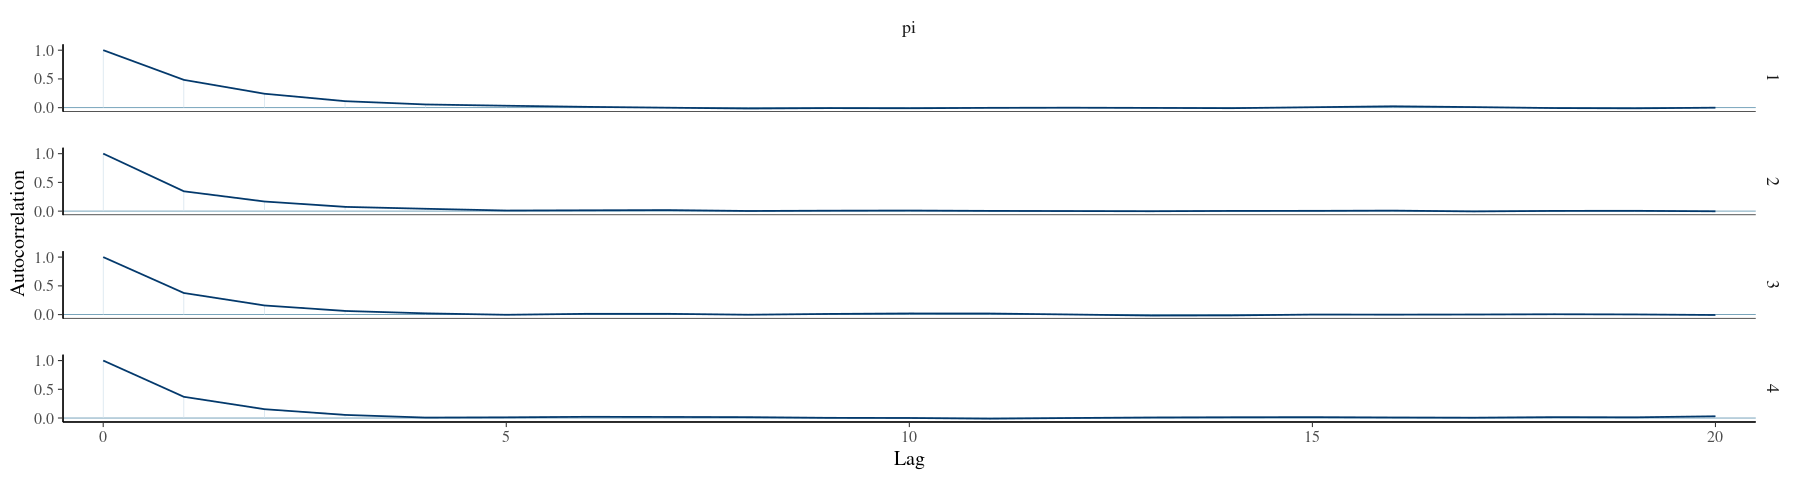

In [56]:
mcmc_acf( climate_change_sim, pars="pi" )

Autocorrelation drops to zero after already 5 lags!

### c)

#### Rhat:

In [57]:
rhat( climate_change_sim, pars="pi" )

[1] 1.000061

Very close to 1 (confirming the conclusion drawn from density overlay).

#### Effective sample size ratio:

In [58]:
neff_ratio( climate_change_sim, pars="pi" )

[1] 0.4073882

Our 40'000 Markov chain values are as effective as $\sim16'000$ uncorrelated samples, this is reasonably efficient.

## Exercise 8.17

### a)

In [59]:
tidy( climate_change_sim, conf.int=TRUE, conf.level=0.95 )

term,estimate,std.error,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
pi,0.1502483,0.01131534,0.1291415,0.1735051


The estimates are extremely close to the computations in Exercise 8.14!

Manual computation of the middle posterior credible interval:

In [60]:
quantile( as.array( climate_change_sim, pars="pi" ), probs=c(0.025, 0.975) )

2.5%     97.5% 
0.1291415 0.1735051

Plot:

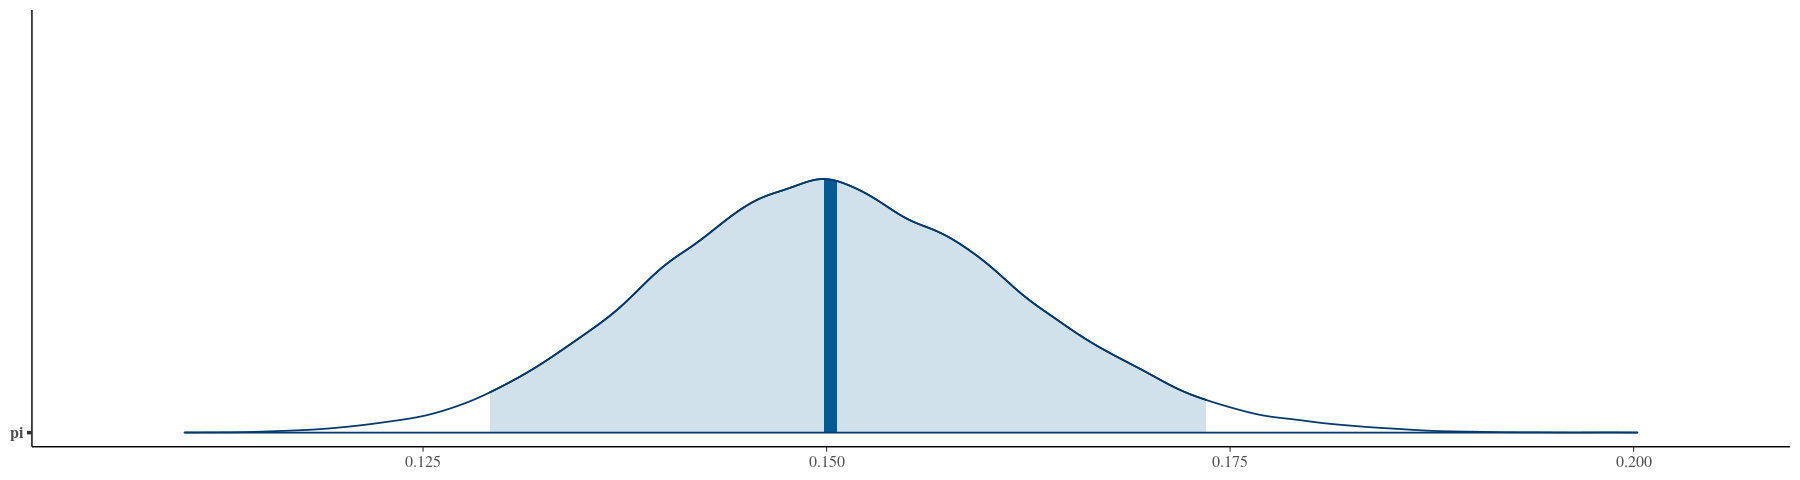

In [61]:
mcmc_areas( climate_change_sim , pars="pi", prob=0.95 )

### b)

In [62]:
mean( as.array( climate_change_sim, pars="pi" ) > 0.1 )

[1] 1

All Markov chain samples for $\pi$ are above 0.1, consistent with the extremely high posterior probability for the alternative hypothesis in exercise 8.15.

### c)

Closeness of credible intervals:

In [63]:
exact_credints <- qbeta(c(0.025, 0.975), 151, 852)
mcmc_credints <- quantile( as.array( climate_change_sim, pars="pi" ), probs=c(0.025, 0.975) )
abs( exact_credints - mcmc_credints ) / exact_credints

2.5%        97.5% 
0.0003208822 0.0010892019

They are exact to around 0.05-0.08%!

Closeness of posterior probabilities for alternative hypothesis:

In [64]:
1 - post_pHa

[1] 3.127498e-07

Extremely high precision!

## Exercise 8.18

### a)

In [65]:
climate_change_df <- as.data.frame( climate_change_sim, pars="pi" )
head( climate_change_df )

,pi
,<dbl>
1,0.1622605
2,0.1606444
3,0.1606444
4,0.1512452
5,0.1673836
6,0.1785230


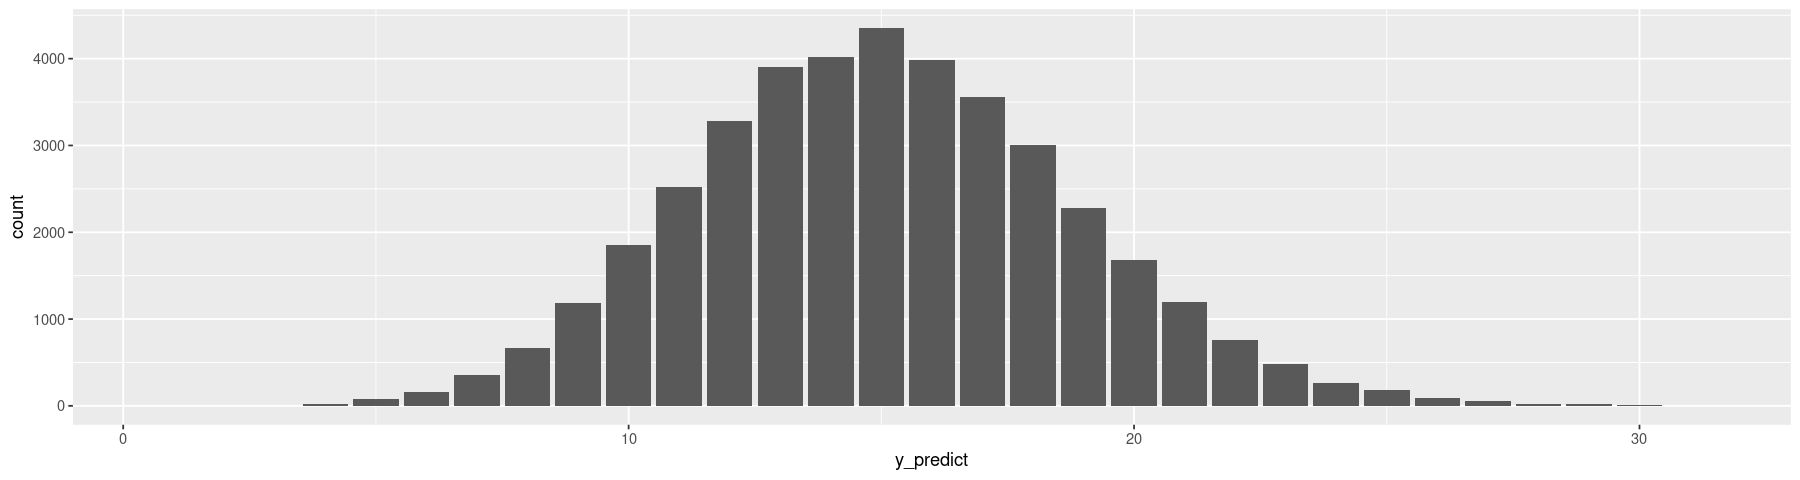

In [66]:
climate_change_pred <- climate_change_df %>% 
    mutate( y_predict = rbinom(length(pi), size=100, prob=pi) )

ggplot( climate_change_pred ) + stat_count( aes(x=y_predict) )

### b)

In [67]:
climate_change_pred %>% summarise( mean=mean(y_predict), sd=sd(y_predict))

mean,sd
<dbl>,<dbl>
15.05823,3.747064


Middle 95%:

In [68]:
quantile( climate_change_pred$y_predict, prob=c(0.025, 0.975) )

2.5% 97.5% 
    8    23

The mean of the predicted number of people who do not believe in climate change remains approximately the same, however the middle posterior predictive 95% credible interval is significantly enlarged due to sampling variability.

### c)

In [69]:
mean( climate_change_pred$y > 20 )

[1] 0.076925

8%

## Exercise 8.19

### a)

Test for normality:

In [70]:
adelie <- penguins_bayes %>% 
    filter(species=="Adelie") %>% 
    filter(!is.na(flipper_length_mm))

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


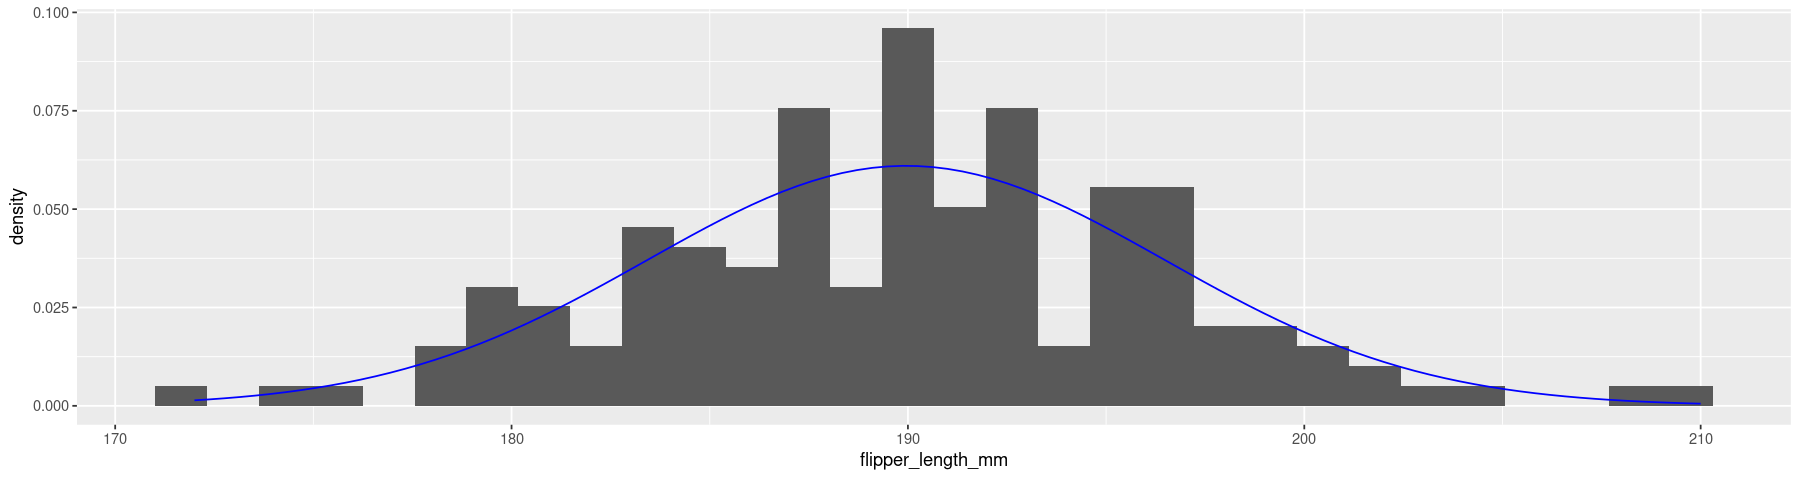

In [71]:
ggplot( adelie, aes(x=flipper_length_mm) ) + 
    geom_histogram( aes(y=..density..) ) +
    stat_function(
        fun = dnorm, 
        args = list(mean = mean(adelie$flipper_length_mm), sd = sd(adelie$flipper_length_mm)), 
        col="blue"
    )

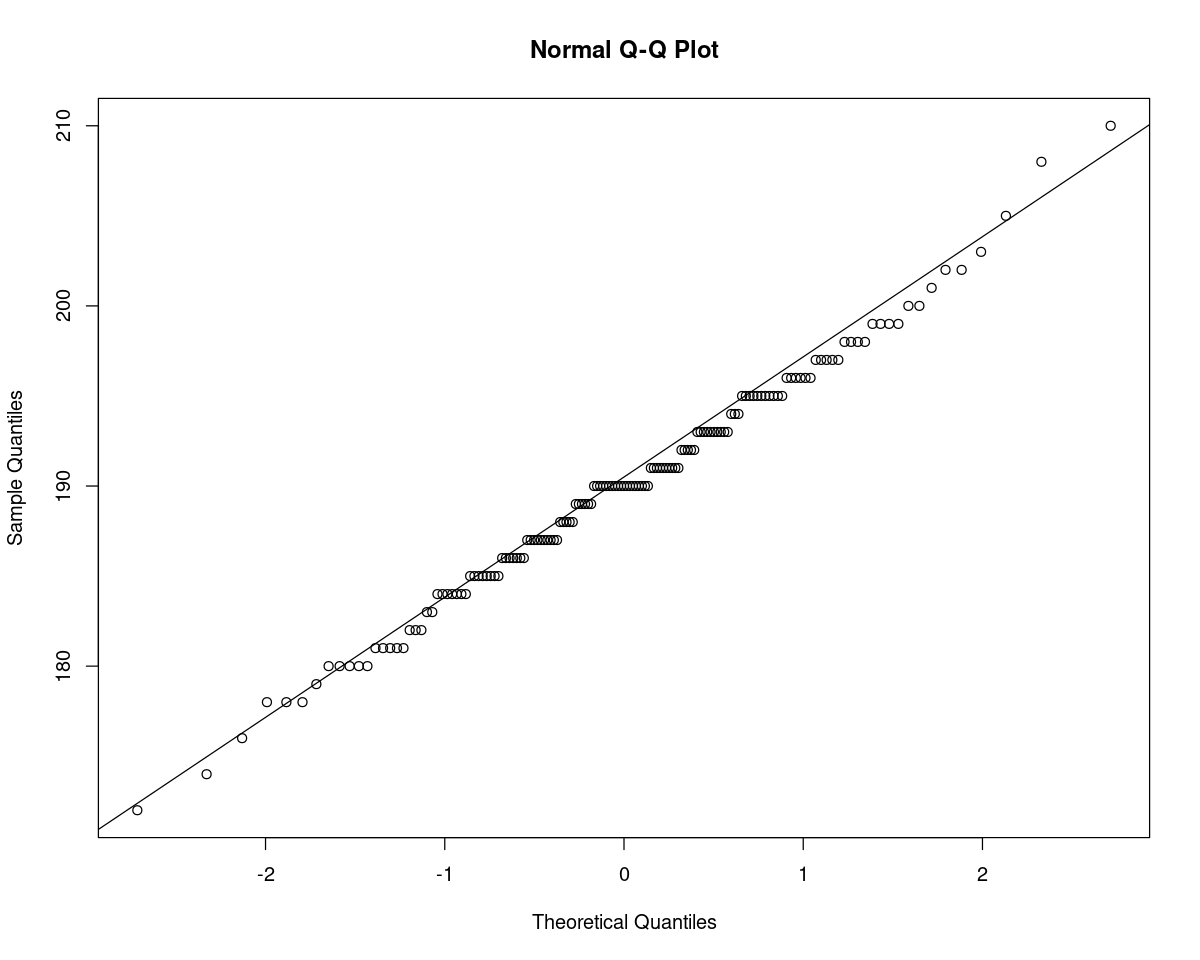

In [72]:
options(repr.plot.width=10, repr.plot.height=8)
qqnorm( adelie$flipper_length_mm )
qqline( adelie$flipper_length_mm )

The data seem to fit well to a normal distribution!

### b)

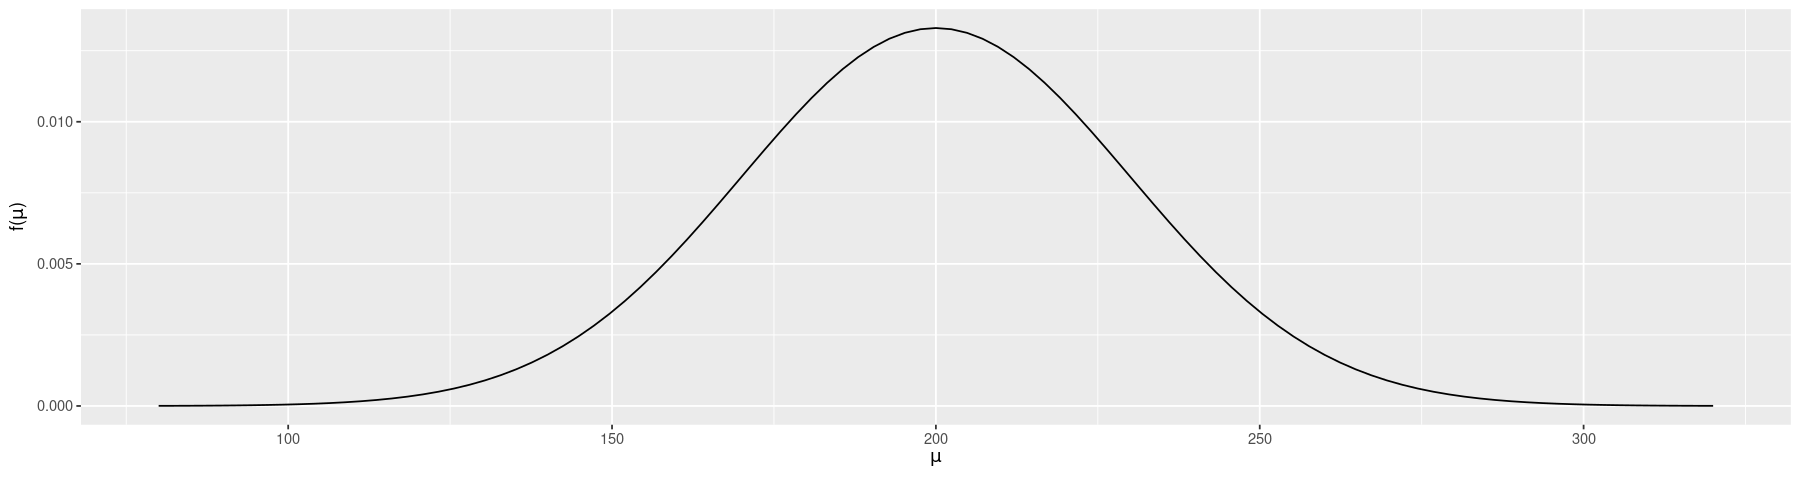

In [73]:
options(repr.plot.width=15, repr.plot.height=4)
plot_normal( mean=200, sd=30 )

### c)

In [74]:
dim(adelie)

[1] 151   9

In [75]:
mean(adelie$flipper_length_mm)

[1] 189.9536

Standard deviation:

In [76]:
sd(adelie$flipper_length_mm)

[1] 6.539457

### d)

In the previous theoretical exercises, it was usually assumed that $\sigma$ is known. However, in this exercise, no population $\sigma$ is given. This might be a mistake, as normal models with unknown $\sigma$ have not been introduced yet. I have reported this to the authors, for simplicity we just assume that the sample standard deviation is the population standard deviation:

In [77]:
sigma <- sd( adelie$flipper_length_mm )

Posterior model:

In [78]:
summarize_normal_normal( mean=200, sd=30, sigma=sigma, y_bar=mean(adelie$flipper_length_mm), n=151 )

model,mean,mode,var,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
prior,200.0000,200.0000,900.0000000,30.0000000
posterior,189.9568,189.9568,0.2831195,0.5320898


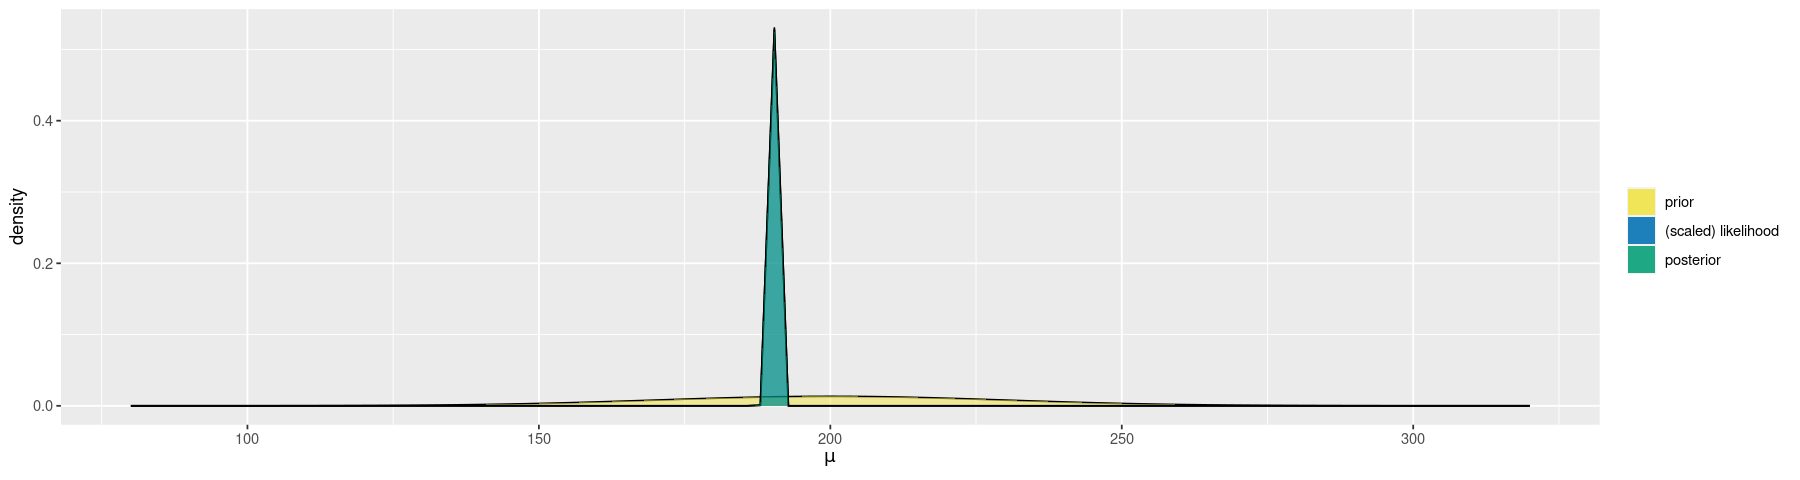

In [79]:
plot_normal_normal( mean=200, sd=30, sigma=sigma, y_bar=mean(adelie$flipper_length_mm), n=151 )

95% middle posterior credible interval:

In [80]:
qnorm( c(0.025,0.975), mean=189.957, sd=0.532 )

[1] 188.9143 190.9997

The mean is somewhere between 188.9 and 190.1 mm with a plausibility of 95%.

## Exercise 8.20

### c)

Posterior probability of the null hypothesis:

In [81]:
pnorm( 220, mean=189.957, sd=0.532 ) - pnorm( 200, mean=189.957, sd=0.532 )

[1] 0

## Exercise 8.21

### a)

Quick exploratory data analysis of loons dataset:

In [82]:
loons

year,count,hours,count_per_hour,count_per_100
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,0,143.50,0.000000000,0
2001,7,153.50,0.045602606,5
2002,0,228.30,0.000000000,0
2003,1,248.75,0.004020101,0
2004,1,203.75,0.004907975,0
2005,4,245.75,0.016276704,2
2006,1,223.00,0.004484305,0
2007,4,214.00,0.018691589,2
2008,2,227.00,0.008810573,1


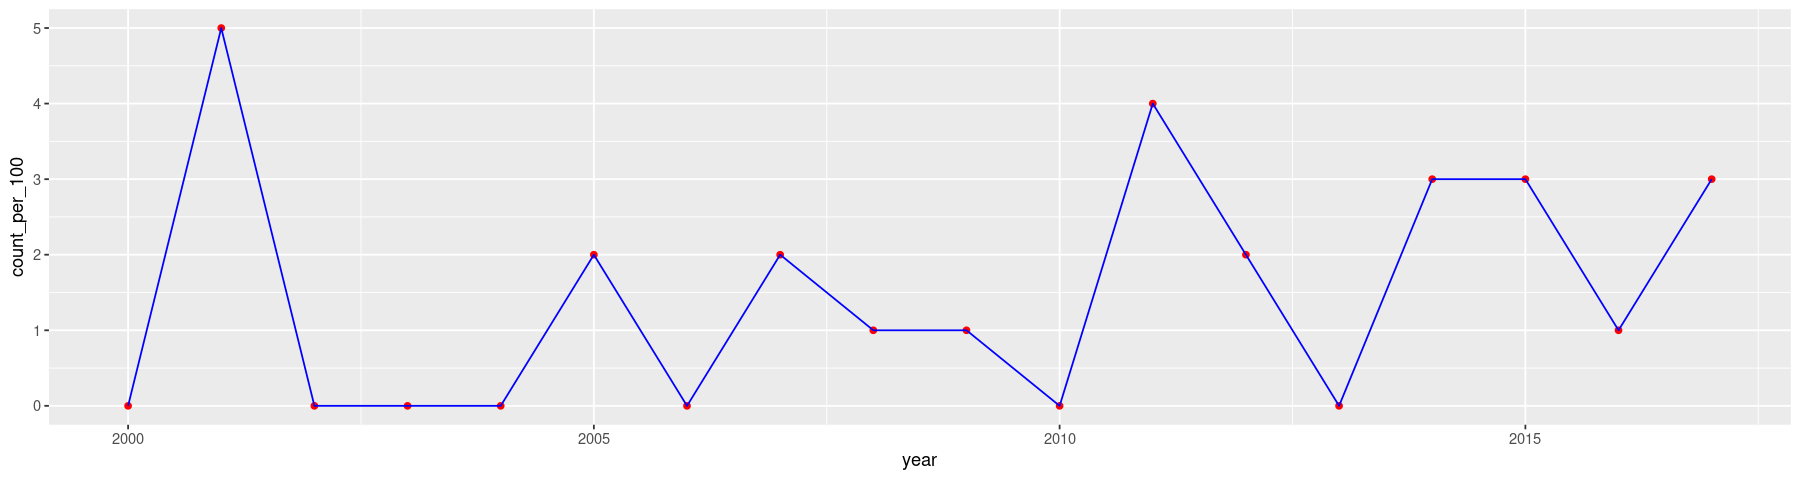

In [83]:
ggplot( loons, aes(x=year, y=count_per_100) ) + geom_point( color="red" ) + geom_line( color="blue" )

No visible clear trend over the years.

In [84]:
mean( loons$count_per_100 )

[1] 1.5

In [85]:
var( loons$count_per_100 )

[1] 2.5

A poisson distribution should have the same mean and variance $\lambda$! Comparison of relative counts:

In [86]:
props <- loons %>% 
    group_by( count_per_100 ) %>% 
    summarise( prop=n()/length(loons$count_per_100) )

props$model_prop <- dpois( seq(0,5), lambda = mean(loons$count_per_100) )
props

count_per_100,prop,model_prop
<dbl>,<dbl>,<dbl>
0,0.38888889,0.22313016
1,0.16666667,0.33469524
2,0.16666667,0.25102143
3,0.16666667,0.12551072
4,0.05555556,0.04706652
5,0.05555556,0.01411996


There is quite some difference! The actual distribution concentrates more mass around a count of zero.

In [87]:
props %>% pivot_longer(-count_per_100)

count_per_100,name,value
<dbl>,<chr>,<dbl>
0,prop,0.38888889
0,model_prop,0.22313016
1,prop,0.16666667
1,model_prop,0.33469524
2,prop,0.16666667
2,model_prop,0.25102143
3,prop,0.16666667
3,model_prop,0.12551072
4,prop,0.05555556


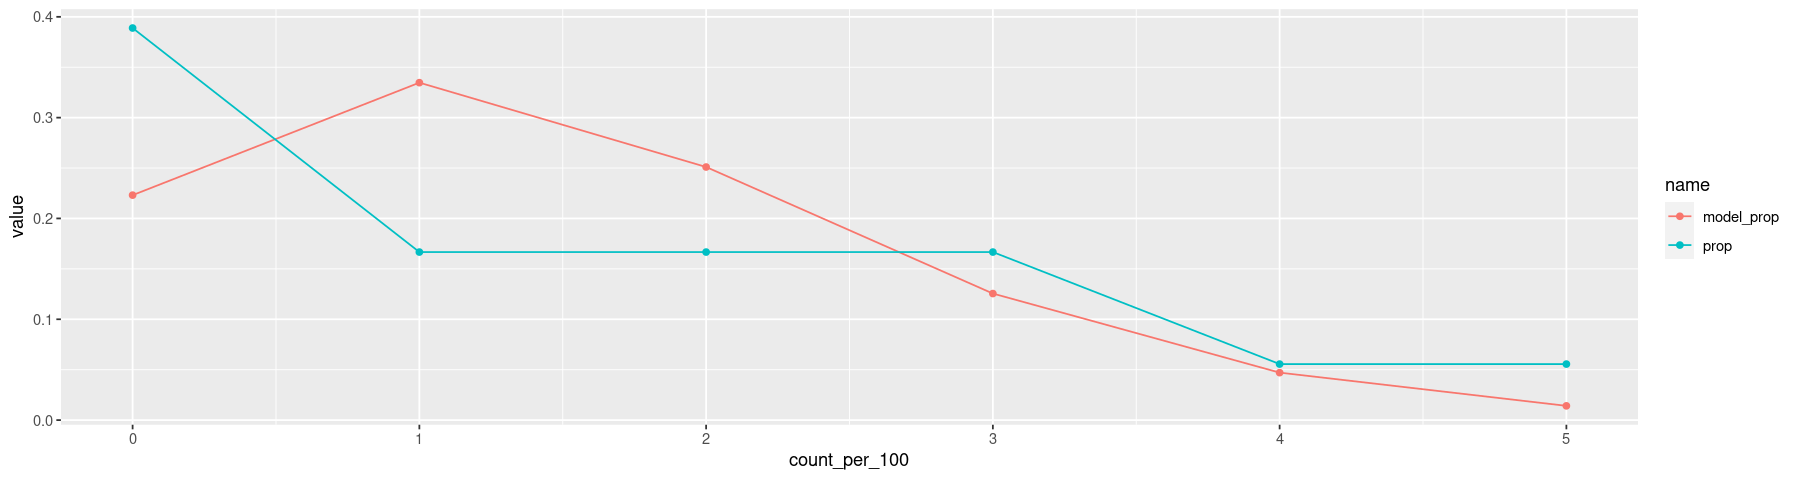

In [88]:
ggplot( props %>% pivot_longer(-count_per_100), aes(x=count_per_100, y=value, col=name) ) +
    geom_point() +
    geom_line()

### d)

In [89]:
summarize_gamma_poisson( shape = 4, rate = 2, sum_y = sum(loons$count_per_100), n = 18)

model,shape,rate,mean,mode,var,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
prior,4,2,2.00,1.5,1.0000,1.0000000
posterior,31,20,1.55,1.5,0.0775,0.2783882


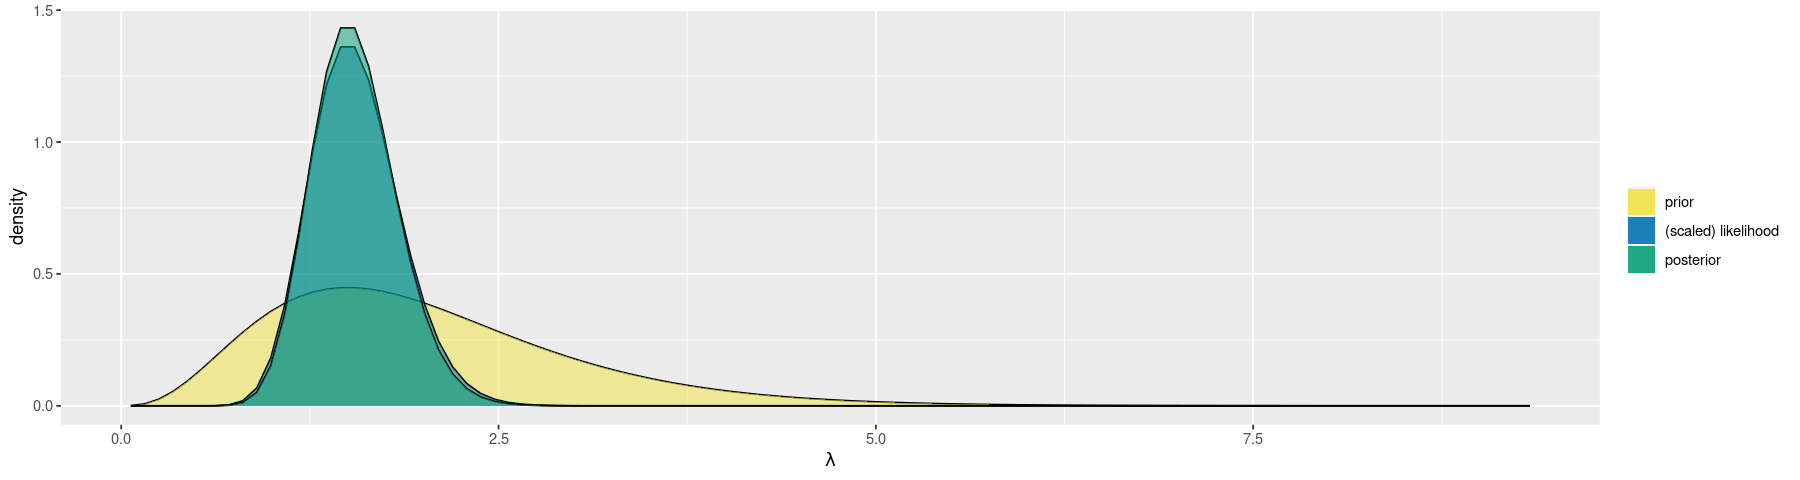

In [90]:
plot_gamma_poisson( shape = 4, rate = 2, sum_y = sum(loons$count_per_100), n = 18)

In [91]:
qgamma( c(0.025, 0.975), shape=31, rate=20 )

[1] 1.053150 2.141343

## Exercise 8.22

### c)

In [92]:
pgamma( 1, shape=31, rate=20 )

[1] 0.01347468

In [93]:
odds <- (1-pgamma( 1, shape=31, rate=20 )) / pgamma( 1, shape=31, rate=20 )
odds

[1] 73.21326

## Exercise 8.23

### a)

Define the model:

In [94]:
loons_model <- "
    data {
        int<lower=0> Y[18];
    }
    parameters {
        real<lower=0> lambda;
    }
    model {
        Y ~ poisson(lambda);
        lambda ~ gamma(4, 2);
    }
"

Simulate the posterior:

In [95]:
loons_sim <- stan( 
    model_code = loons_model,
    data = list(Y = loons$count_per_100),
    chains = 4,
    iter = 10000*2,
    seed = 123
)


SAMPLING FOR MODEL '9d263e724762cff207fae024cf77c652' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:     1 / 20000 [  0%]  (Warmup)
Chain 1: Iteration:  2000 / 20000 [ 10%]  (Warmup)
Chain 1: Iteration:  4000 / 20000 [ 20%]  (Warmup)
Chain 1: Iteration:  6000 / 20000 [ 30%]  (Warmup)
Chain 1: Iteration:  8000 / 20000 [ 40%]  (Warmup)
Chain 1: Iteration: 10000 / 20000 [ 50%]  (Warmup)
Chain 1: Iteration: 10001 / 20000 [ 50%]  (Sampling)
Chain 1: Iteration: 12000 / 20000 [ 60%]  (Sampling)
Chain 1: Iteration: 14000 / 20000 [ 70%]  (Sampling)
Chain 1: Iteration: 16000 / 20000 [ 80%]  (Sampling)
Chain 1: Iteration: 18000 / 20000 [ 90%]  (Sampling)
Chain 1: Iteration: 20000 / 20000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.029566 seconds (Warm-up)
Chain 1:                0.0304

### b)

#### Trace plots:

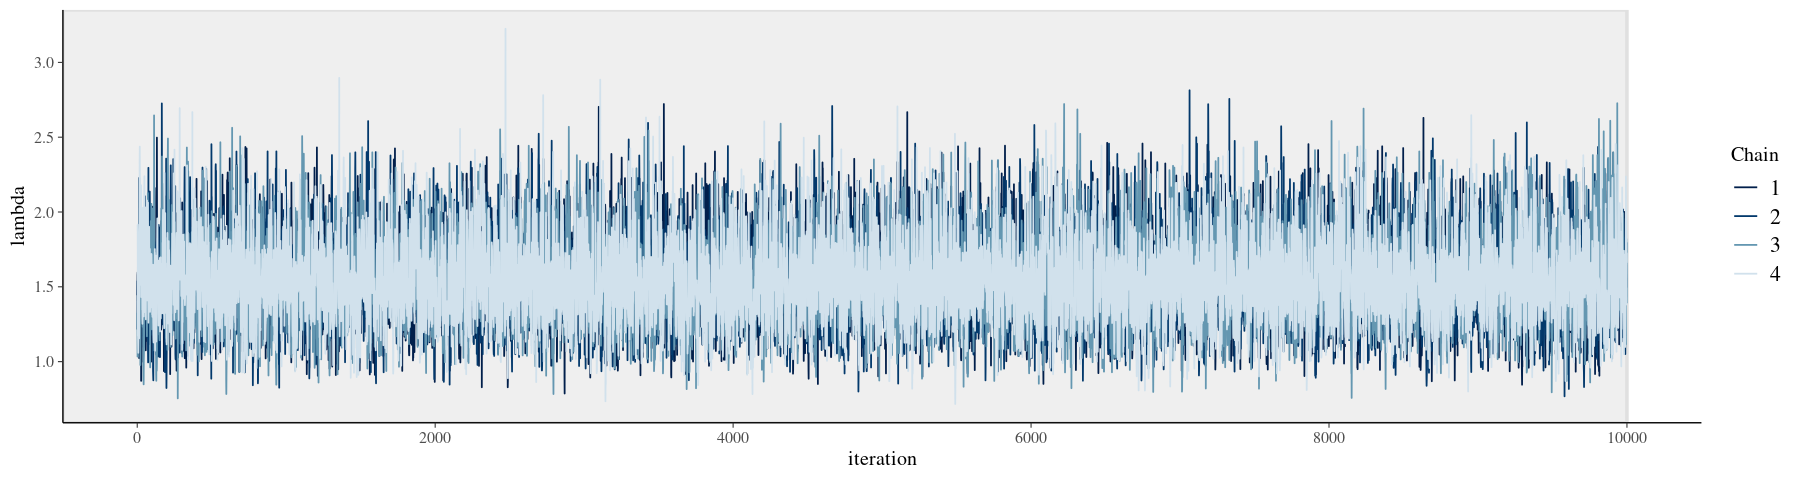

In [96]:
mcmc_trace( loons_sim, pars="lambda", size=0.5, n_warmup=10000 ) + xlab("iteration")

At first sight it looks like all the chains have mixed well!

#### Density overlays:

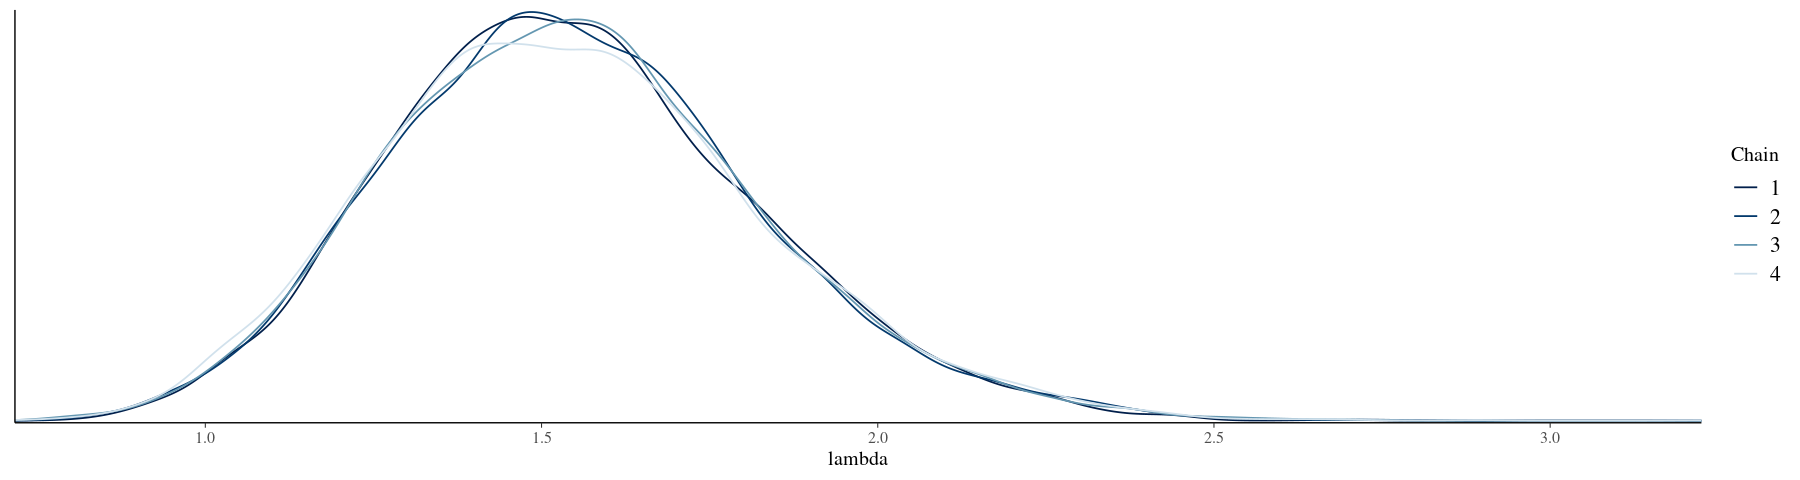

In [97]:
mcmc_dens_overlay( loons_sim, pars="lambda" )

The densities are also quite similar, it seems that all chains have explored the full distribution.

#### Autocorrelation plots:

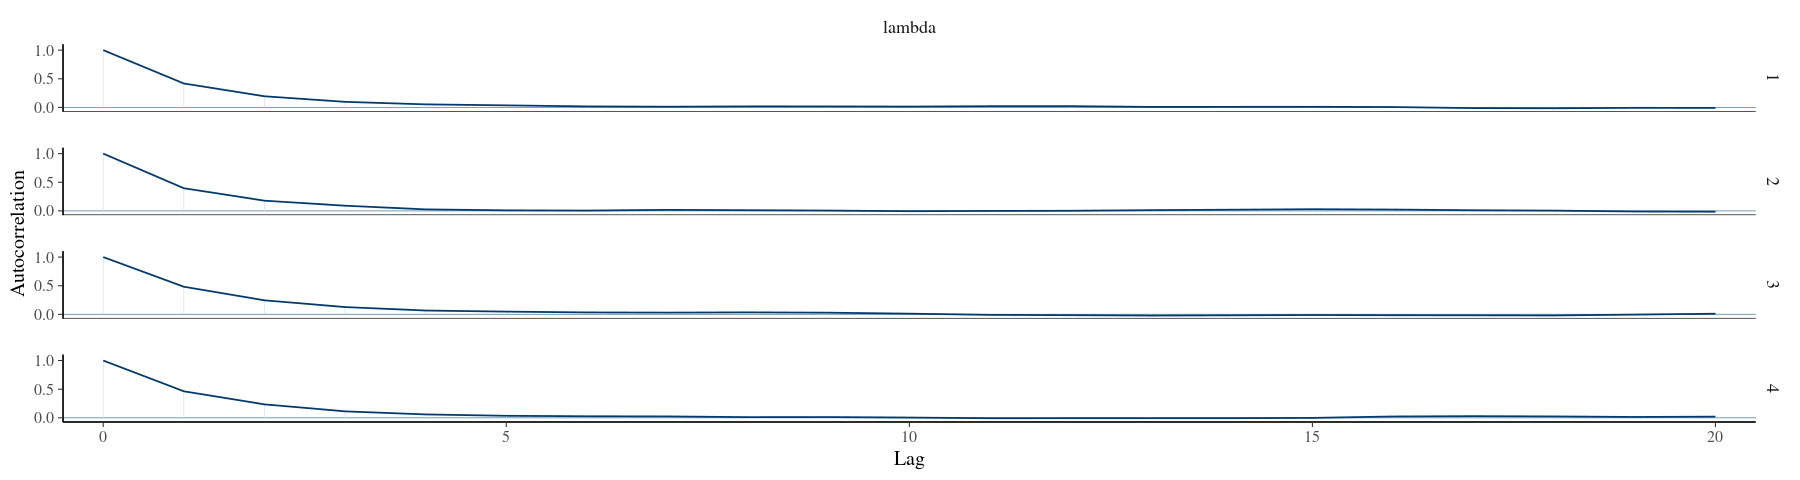

In [98]:
mcmc_acf( loons_sim, pars="lambda" )

Autocorrelation drops to zero after already 5 lags!

#### Rhat:

In [99]:
rhat( loons_sim, pars="lambda" )

[1] 1.000004

Very close to 1 (confirming the conclusion drawn from density overlay).

#### Effective sample size ratio:

In [100]:
neff_ratio( loons_sim, pars="lambda" )

[1] 0.3501081

Our 40'000 Markov chain values are as effective as $\sim13'700$ uncorrelated samples, this is reasonably efficient.

### c)

In [101]:
tidy( loons_sim, conf.int=TRUE, conf.level=0.95 )

term,estimate,std.error,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
lambda,1.532534,0.2776614,1.050233,2.146979


In [102]:
quantile( as.array( loons_sim, pars="lambda" ), c(0.025,0.975) )

2.5%    97.5% 
1.050233 2.146979

### d)

In [103]:
mean( as.array( loons_sim, pars="lambda" ) < 1 )

[1] 0.012725

Very close to closed form computation.

### e)

middle 95% posterior credible interval:

In [104]:
exact_credints <- qgamma( c(0.025, 0.975), shape=31, rate=20 )
mcmc_credints <- quantile( as.array( loons_sim, pars="lambda" ), c(0.025,0.975) )
abs( exact_credints - mcmc_credints ) / exact_credints

2.5%       97.5% 
0.002769189 0.002632022

Difference in the 0.3% regime.

Probability for null hypothesis $H_0$:

In [105]:
abs( mean( as.array( loons_sim, pars="lambda" ) < 1 ) - pgamma( 1, shape=31, rate=20 ) ) / pgamma( 1, shape=31, rate=20 )

[1] 0.05563629

5.5% difference

### Exercise 8.24

### a)

In [106]:
loons_pred <- as.data.frame( loons_sim, pars="lambda" )
head( loons_pred )

,lambda
,<dbl>
1,1.443592
2,1.578568
3,1.597217
4,1.407536
5,1.482347
6,1.433530


In [107]:
set.seed(1)
loons_pred <- loons_pred %>% 
  mutate( y_predict = rpois(length(lambda), lambda = lambda) )

head( loons_pred )

,lambda,y_predict
,<dbl>,<int>
1,1.443592,1
2,1.578568,1
3,1.597217,2
4,1.407536,3
5,1.482347,0
6,1.433530,3


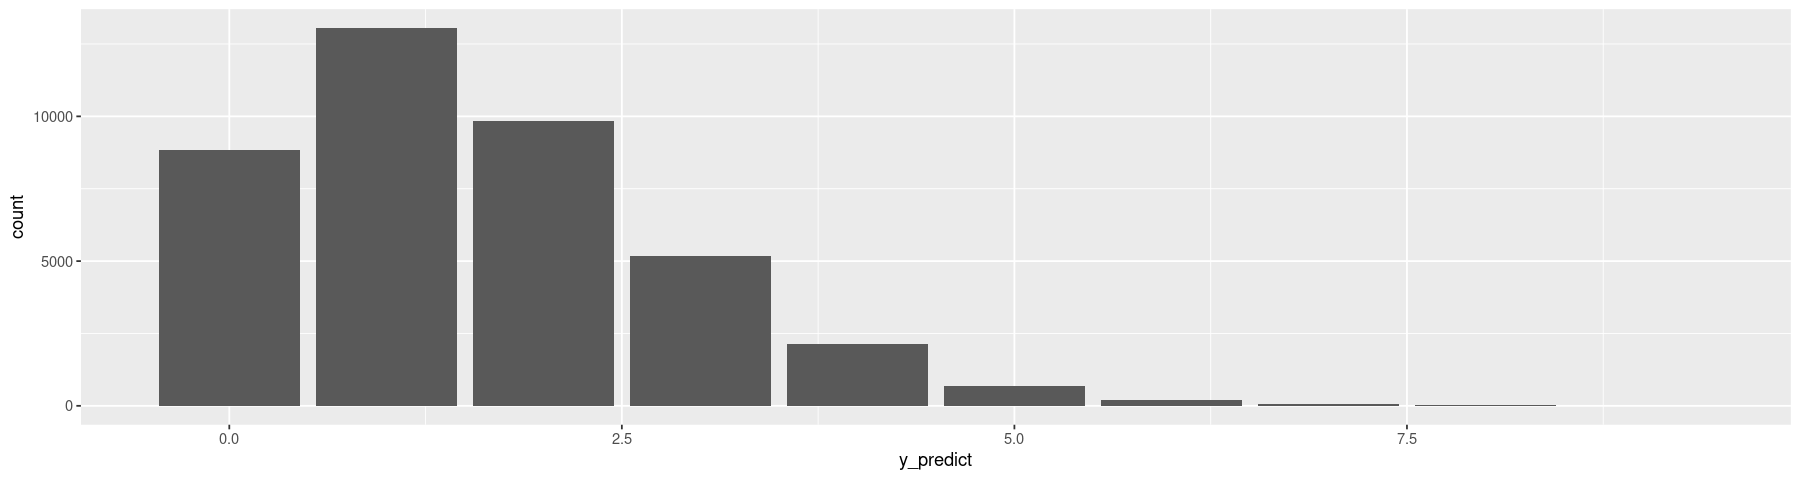

In [108]:
ggplot( loons_pred ) + stat_count( aes(x=y_predict) )

### b)

In [109]:
loons_pred %>% 
    summarise( mean=mean(y_predict), var=var(y_predict) )

mean,var
<dbl>,<dbl>
1.54715,1.628518


In [110]:
table( loons_pred$y_predict )


    0     1     2     3     4     5     6     7     8     9 
 8852 13051  9833  5185  2130   680   205    49    14     1 

### c)

In [111]:
mean( loons_pred$y_predict == 0 )

[1] 0.2213